In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [121]:
df = pd.read_csv('headbrain.csv')

In [122]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [123]:
df.shape

(237, 4)

In [124]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [125]:
head_size = 'Head Size(cm^3)'
brain_weight = 'Brain Weight(grams)'

In [126]:
X = df[[head_size, brain_weight]]
X.head()

,Head Size(cm^3),Brain Weight(grams)
0,4512,1530
1,3738,1297
2,4261,1335
3,3777,1282
4,4177,1590


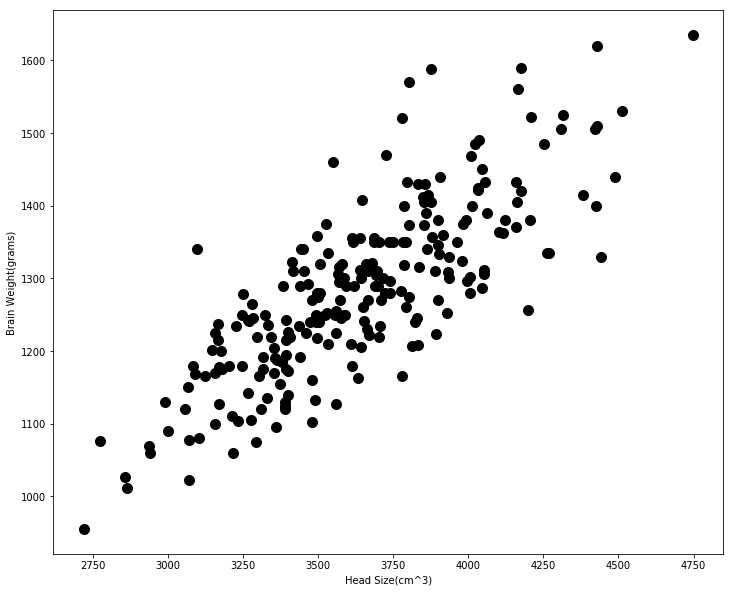

In [127]:
fig, ax = plt.subplots(figsize=(12,10))
plt.scatter(X[head_size], X[brain_weight], s=100, c='black')

ax.set(xlabel='Head Size(cm^3)', ylabel='Brain Weight(grams)')
plt.show();

In [128]:
ee = EllipticEnvelope(support_fraction=None, contamination=0.1)

In [129]:
# -1 represents outliers and 1 represents inliers in the dataset
y_pred = ee.fit_predict(X)
y_pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [130]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

In [131]:
# generates 500 numbers between min and max
xx, yy = np.meshgrid(np.linspace(X[head_size].min(), X[head_size].max(), 500),
                     np.linspace(X[brain_weight].min(), X[brain_weight].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

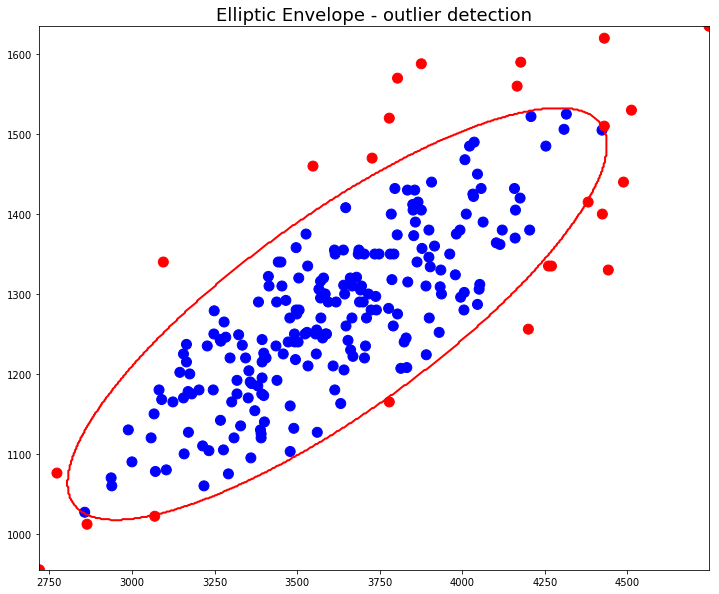

In [132]:
colors = np.array(['r','b'])

plt.figure(figsize=(12,10))

plt.title("Elliptic Envelope - outlier detection", size=18)

plt.scatter(X[head_size],
            X[brain_weight],
            color=colors[(y_pred+1) // 2 ],
            s=100)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red' )

plt.show();

In [133]:
# the next example is outlier detection using IsolationForest

In [134]:
isf = IsolationForest(behaviour='New', contamination=0.08)

In [135]:
y_pred = isf.fit_predict(X)
y_pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [136]:
n_outliers = (y_pred == -1).sum()
n_outliers

19

In [137]:
# generates 500 numbers between min and max
xx, yy = np.meshgrid(np.linspace(X[head_size].min(), X[head_size].max(), 500),
                     np.linspace(X[brain_weight].min(), X[brain_weight].max(), 500))

Z = isf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

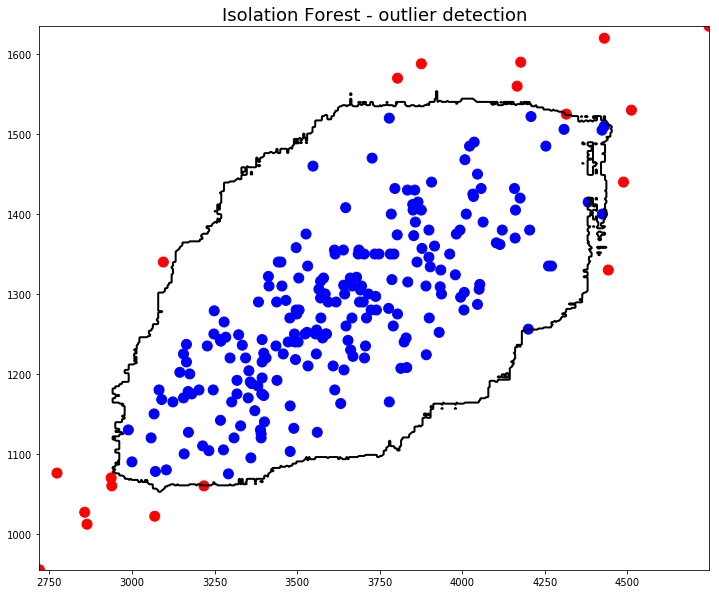

In [138]:
colors = np.array(['r','b'])

plt.figure(figsize=(12,10))

plt.title("Isolation Forest - outlier detection", size=18)

plt.scatter(X[head_size],
            X[brain_weight],
            color=colors[(y_pred+1) // 2 ],
            s=100)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black' )

plt.show();

In [ ]:
# the next example is outlier detection using LocalOulierFactor

In [145]:
lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')

In [146]:
y_pred = isf.fit_predict(X)
y_pred

array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [147]:
n_outliers = (y_pred == -1).sum()
n_outliers

19

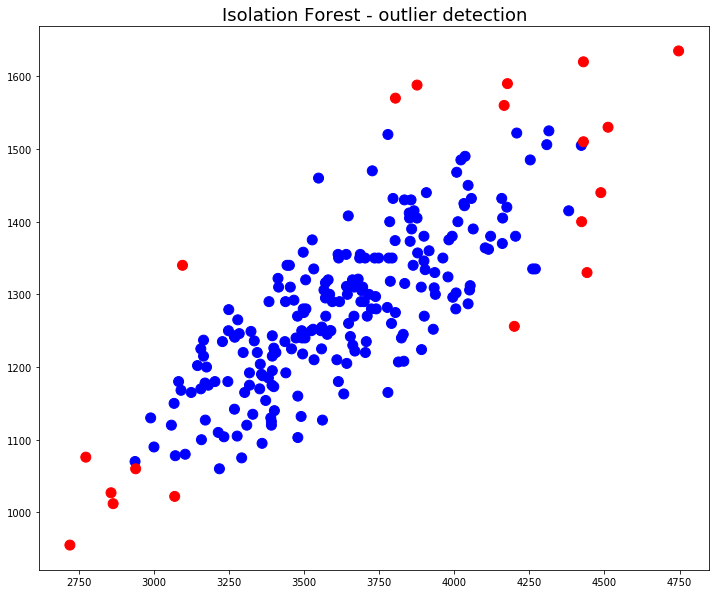

In [149]:
colors = np.array(['r','b'])

plt.figure(figsize=(12,10))

plt.title("Isolation Forest - outlier detection", size=18)

plt.scatter(X[head_size],
            X[brain_weight],
            color=colors[(y_pred+1) // 2 ],
            s=100)

plt.show();